<a href="https://colab.research.google.com/github/Riyaz00shaik/project-on-tweet-analyssi/blob/main/Twitter_Sentiment_Analysis_by_RIYAZ_p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
jp797498e_twitter_entity_sentiment_analysis_path = kagglehub.dataset_download('jp797498e/twitter-entity-sentiment-analysis')

print('Data source import complete.')


100%|██████████| 1.99M/1.99M [00:00<00:00, 91.8MB/s]

Extracting files...
Data source import complete.


In [2]:
# This Python 3 environment comes wit/h many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [48]:
import os
import pandas as pd
import kagglehub
jp797498e_twitter_entity_sentiment_analysis_path = kagglehub.dataset_download('jp797498e/twitter-entity-sentiment-analysis')
train = pd.read_csv(os.path.join(jp797498e_twitter_entity_sentiment_analysis_path, 'twitter_training.csv'), header=None)
val = pd.read_csv(os.path.join(jp797498e_twitter_entity_sentiment_analysis_path, 'twitter_validation.csv'), header=None)
train.columns=['ID','entity','sentiment','tweet_content']
val.columns=['ID','entity','sentiment','tweet_content']

Using Colab cache for faster access to the 'twitter-entity-sentiment-analysis' dataset.


In [6]:
print('Training Dataset:')
display(train.head())
print('Validation Dataset:')
display(val.head())

Training Dataset:


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


Validation Dataset:


,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [7]:
train.columns=['ID','entity','sentiment','tweet_content']

In [8]:
train.head()

,ID,entity,sentiment,tweet_content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [9]:
val.columns=['ID','entity','sentiment','tweet_content']

In [10]:
val.head()

,ID,entity,sentiment,tweet_content
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             74681 non-null  int64 
 1   entity         74681 non-null  object
 2   sentiment      74681 non-null  object
 3   tweet_content  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [12]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             999 non-null    int64 
 1   entity         999 non-null    object
 2   sentiment      999 non-null    object
 3   tweet_content  999 non-null    object
dtypes: int64(1), object(3)
memory usage: 31.3+ KB


In [13]:
print('Null values in training data:')
display(train.isnull().sum())
print('Null values in validation dataset:')
display(val.isnull().sum())

Null values in training data:


,0
ID,0
entity,0
sentiment,0
tweet_content,686


Null values in validation dataset:


,0
ID,0
entity,0
sentiment,0
tweet_content,0


In [14]:
train=train.dropna()

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

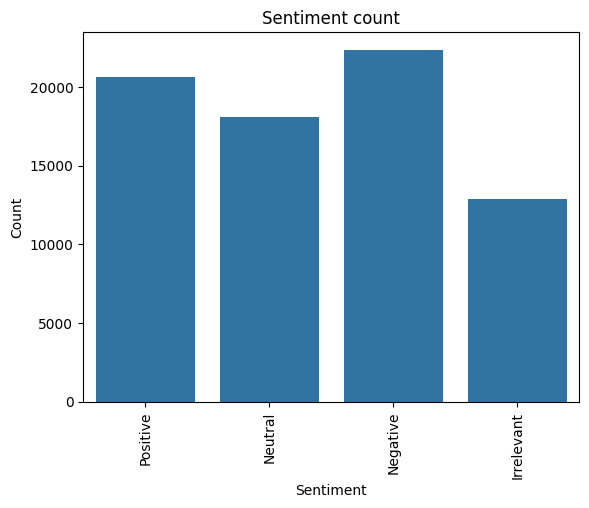

In [16]:
sns.countplot(data=train,x='sentiment')
plt.title('Sentiment count')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [17]:
train=train.drop(['ID'],axis=1)
val=val.drop(['ID'],axis=1)

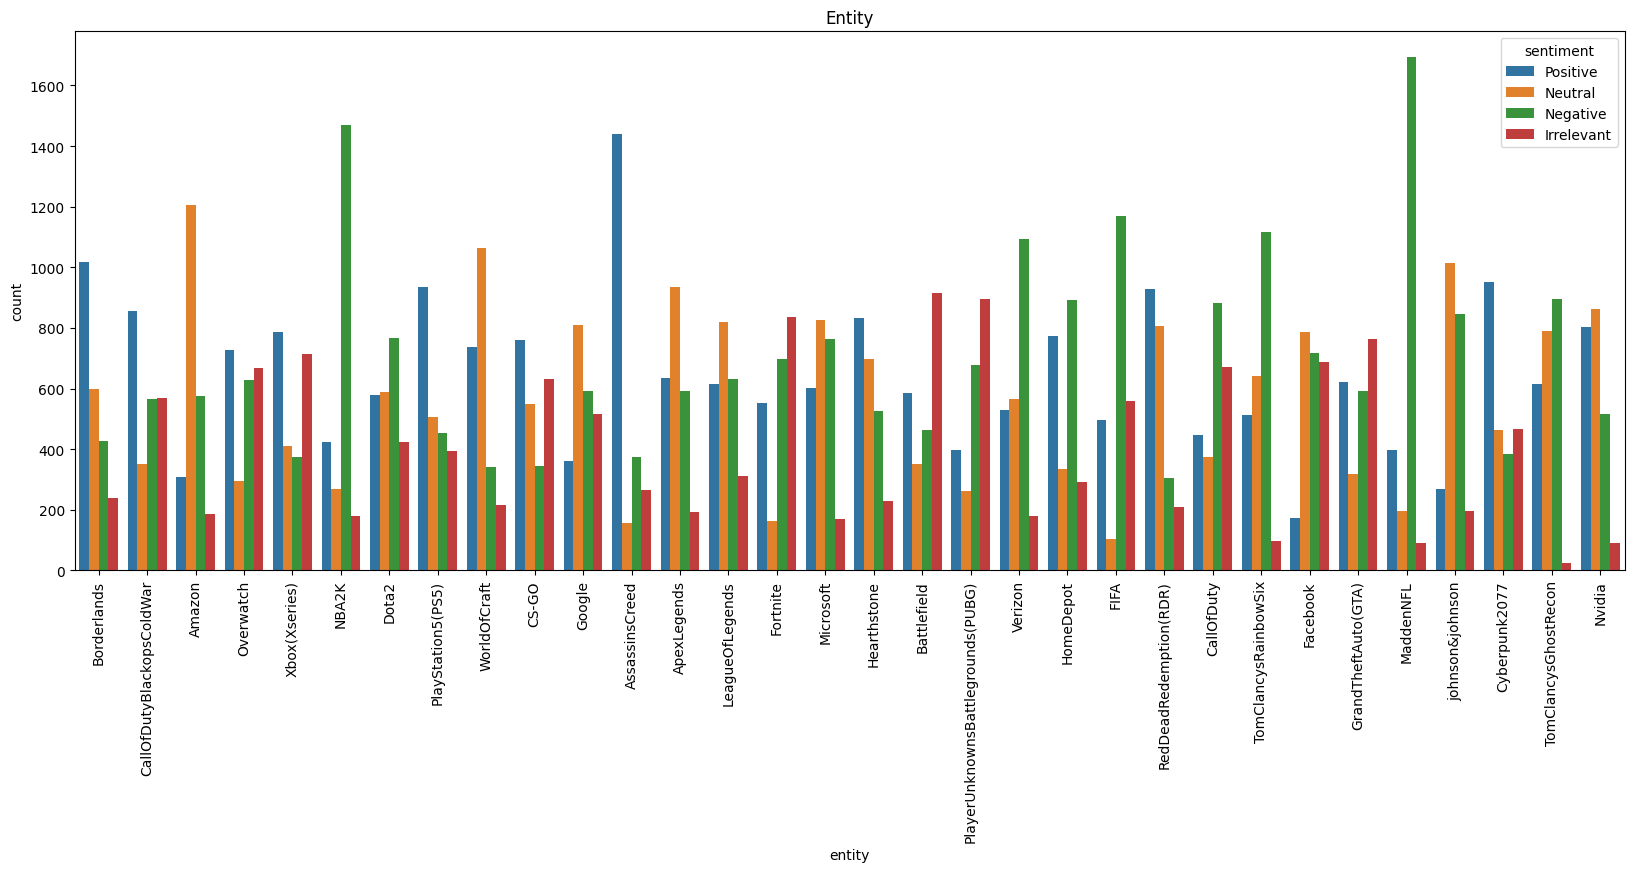

In [18]:
plt.figure(figsize=(20,7))
sns.countplot(data=train,x='entity',hue='sentiment')
plt.title('Entity')
plt.xlabel('entity')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

In [19]:
train=train.drop('entity',axis=1)
val=val.drop('entity',axis=1)

In [20]:
train.head(2)

,sentiment,tweet_content
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...


In [21]:
import re

In [22]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [23]:
def clean_df(text):
    # Removes url
    text=re.sub(r'http\S+|www.\S+','',text)
    #Removes mentions and hashtag
    text=re.sub(r'@\w+|#\w+','',text)
    #Removes Special characters and numbers
    text=re.sub(r'^a-zA-Z\s','',text)
    #Converts to lower
    text=text.lower()
    #Removes extra white space
    text=re.sub(r'\s+',' ',text).strip()
    #return text
    words=word_tokenize(text)
    lemmatize=WordNetLemmatizer()
    words=[lemmatize.lemmatize(word) for word in words]
    stopword=set(stopwords.words('english'))
    words=[word for word in words if word not in stopword]
    words=[word for word in words if len(word)>4]
    indices=np.unique(words,return_index=True)[1]
    clean_text=np.array(words)[np.sort(indices)].tolist()
    return clean_text





In [24]:
#X=train.drop('sentiment',axis=1)
#y=train['sentiment']

In [25]:
#texts=list(X['tweet_content'])
train_data=list(train['tweet_content'])
test_data=list(val['tweet_content'])

In [29]:
import numpy as np
#text_clean=[clean_df(text) for text in texts]
train_clean=[clean_df(text) for text in train_data]
test_clean=[clean_df(text) for text in test_data]

In [30]:
#text_clean

In [31]:
#from sklearn.model_selection import train_test_split

In [32]:
#X_train,X_test,y_train,y_test=train_test_split(text_clean,y,test_size=0.2,random_state=0)

In [33]:
X_train=train_clean
X_test=test_clean


In [35]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
y_train=lr.fit_transform(train['Positive'])
y_test=lr.transform(val['Irrelevant'])

In [36]:
#X_train

In [37]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [38]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X_train)
word_idx=tokenizer.word_index
sizevocab=len(word_idx)

In [39]:
sizevocab

31755

In [40]:
X_train=tokenizer.texts_to_sequences(X_train)
X_test=tokenizer.texts_to_sequences(X_test)
X_train=pad_sequences(X_train,maxlen=150)
X_test=pad_sequences(X_test,maxlen=150)

In [41]:
#X_train

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [49]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

def clean_df(text):
    if text is None: # Handle None values from dropped rows
        return []
    text=re.sub(r'http\S+|www.\S+','',text)
    text=re.sub(r'@\w+|#\w+','',text)
    text=re.sub(r'[^a-zA-Z\s]','',text) # Fixed regex to keep only letters and spaces
    text=text.lower()
    text=re.sub(r'\s+',' ',text).strip()
    words=word_tokenize(text)
    lemmatize=WordNetLemmatizer()
    words=[lemmatize.lemmatize(word) for word in words]
    stopword=set(stopwords.words('english'))
    words=[word for word in words if word not in stopword]
    words=[word for word in words if len(word)>4]
    indices=np.unique(words,return_index=True)[1]
    clean_text=np.array(words)[np.sort(indices)].tolist()
    return clean_text

# Ensure train DataFrame has nulls dropped and correct columns for consistent y_train generation
train = train.dropna() # This will reduce train to 73995 rows

# Ensure train and val have 'sentiment' and 'tweet_content' columns and drop 'ID' and 'entity'
# Based on kernel state, these columns are already present, but for robustness, ensure they are in the correct form.
# Drop 'ID' and 'entity' columns if they still exist
if 'ID' in train.columns:
    train = train.drop(['ID'], axis=1)
if 'entity' in train.columns:
    train = train.drop('entity', axis=1)
if 'ID' in val.columns:
    val = val.drop(['ID'], axis=1)
if 'entity' in val.columns:
    val = val.drop('entity', axis=1)

# Regenerate train_data and test_data from the consistently processed DataFrames
train_data = list(train['tweet_content'])
test_data = list(val['tweet_content'])

# Clean the data
train_clean = [clean_df(text) for text in train_data]
test_clean = [clean_df(text) for text in test_data]

# Assign to X_train_raw and X_test_raw for tokenization
X_train_raw = train_clean
X_test_raw = test_clean

# Re-encode y_train and y_test from the consistently processed DataFrames
lr = LabelEncoder()
y_train = lr.fit_transform(train['sentiment'])
y_test = lr.transform(val['sentiment'])

# Re-tokenize and pad sequences for the newly generated X_train and X_test
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_raw)
word_idx = tokenizer.word_index
sizevocab = len(word_idx)

X_train = tokenizer.texts_to_sequences(X_train_raw)
X_test = tokenizer.texts_to_sequences(X_test_raw)
X_train = pad_sequences(X_train, maxlen=150)
X_test = pad_sequences(X_test, maxlen=150)

# Now proceed with model fitting
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)
rf_predict=rf.predict(X_test)

In [50]:
cm=confusion_matrix(y_test,rf_predict)

In [51]:
cm

array([[156,   6,   2,   8],
       [  3, 239,   2,  22],
       [  1,  12, 261,  11],
       [  2,  19,   5, 251]])

In [52]:
print(classification_report(y_test,rf_predict))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       172
           1       0.87      0.90      0.88       266
           2       0.97      0.92      0.94       285
           3       0.86      0.91      0.88       277

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



In [53]:
accuracy=accuracy_score(y_test,rf_predict)

In [54]:
print('Accuracy of Random Forest is:',accuracy)

Accuracy of Random Forest is: 0.907


In [55]:
#LSTM MODEL
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Input,Dense,GlobalMaxPooling1D,Dropout
from tensorflow.keras.models import Model
from keras import optimizers
from tensorflow.keras.optimizers import Adam


In [56]:
max_len=150
input=Input(shape=(max_len,))
x=Embedding(sizevocab+1,100)(input)
x=Dropout(0.5)(x)
x=LSTM(150,return_sequences=True)(x)
x=Dropout(0.5)(x)
x=GlobalMaxPooling1D()(x)
x=Dense(64,activation='relu')(x)
x=Dropout(0.5)(x)
x=Dense(4,activation='softmax')(x)

model=Model(input,x)



optimizer=Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [57]:
#from sklearn.preprocessing import LabelEncoder

In [58]:
#le=LabelEncoder()
#y_train_lr=le.fit_transform(y_train)
#y_test_lr=le.transform(y_test)

In [60]:
#X_train

In [59]:
import tensorflow as tf
num_classes=4
y_train_oh=tf.keras.utils.to_categorical(y_train,num_classes=num_classes)
y_test_oh=tf.keras.utils.to_categorical(y_test,num_classes=num_classes)

In [61]:
y_test_oh

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [62]:
history=model.fit(X_train,y_train_oh,epochs=15,valid


                  ation_data=(X_test,y_test_oh))

Epoch 1/15
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 627s 269ms/step - accuracy: 0.4344 - loss: 1.2218 - val_accuracy: 0.7830 - val_loss: 0.6820
Epoch 2/15
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 623s 269ms/step - accuracy: 0.7295 - loss: 0.7062 - val_accuracy: 0.8580 - val_loss: 0.4266
Epoch 3/15
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 616s 266ms/step - accuracy: 0.7928 - loss: 0.5357 - val_accuracy: 0.8790 - val_loss: 0.3302
Epoch 4/15
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 612s 264ms/step - accuracy: 0.8197 - loss: 0.4570 - val_accuracy: 0.8900 - val_loss: 0.3013
Epoch 5/15
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 610s 264ms/step - accuracy: 0.8320 - loss: 0.4146 - val_accuracy: 0.8970 - val_loss: 0.2912
Epoch 6/15
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 619s 263ms/step - accuracy: 0.8452 - loss: 0.3843 - val_accuracy: 0.9030 - val_loss: 0.2803
Epoch 7/15
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 607s 262ms/step - accuracy: 0.8535 - loss: 0.3585 - val_accuracy: 0.9050 - val_loss: 0.2760
Epoch 8/15
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 610s 264ms/step - ac

In [63]:







 loss,accuracy=model.evaluate(X_test,y_test_oh)

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.9198 - loss: 0.2374


In [64]:
print('test loss:',loss)
print('test accuracy:',accuracy)

test loss: 0.2943686842918396
test accuracy: 0.9079999923706055


In [65]:
# prompt: print 5 tweets and display: tweet:"this app is amazing!"- sentiment positive

# Display 5 tweets with their sentiment
for i in range(5):
  tweet = val['tweet_content'].iloc[i]
  sentiment = val['sentiment'].iloc[i]
  print(f'tweet: "{tweet}" - sentiment {sentiment}')

tweet: "I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣" - sentiment Irrelevant
tweet: "BBC News - Amazon boss Jeff Bezos rejects claims company acted like a 'drug dealer' bbc.co.uk/news/av/busine…" - sentiment Neutral
tweet: "@Microsoft Why do I pay for WORD when it functions so poorly on my @SamsungUS Chromebook? 🙄" - sentiment Negative
tweet: "CSGO matchmaking is so full of closet hacking, it's a truly awful game." - sentiment Negative
tweet: "Now the President is slapping Americans in the face that he really did commit an unlawful act after his  acquittal! From Discover on Google vanityfair.com/news/2020/02/t…" - sentiment Neutral
